In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from text_classifier import TextProcessor

#### Текст 1: Latcons.txt 

Обрабатываем текст, удаляя все спец. символы и пробелы, оставляем только последовательность символов заданного алфавита

In [2]:
TextProcessor.process_document('data/voynich', 'latcons.txt', lang='lat')

Получим обработанный текст в переменную языка в виде строки, выведим первые 1000 символов, чтобы убедиться, что всё считалось корректно

In [3]:
with open('data/voynich/processed/latcons.txt', 'r') as processed_file:
    latcons=processed_file.read().replace('\n', '')

In [4]:
latcons[:1000]

'jhnnsdplncrpnlbllshstrcsnnsdplncrpnbbflrcnsspsssnctdmndrgstmrtrsdsdrnssdrtttmprntchrstptrlfnsdscplnclrclsndrsbrgmtschrncnssrsdrbsgstslfrddntslghrdvlgrlqntdntslghrmnrchhgflcndslbrdrgnsclgstfrncrmgcchndfrdvrssdslfnplshstrdprlslxndrmgntcmdsstqdprsndrmrxvnsstndtrmdrrgscptrcntrmnndmmblnsprsptsmtrrmdsrtmttrnsvtprflmnnqstprcllscvrnsstftgtsstncmmltbsssqtmmnsprncpssdcbntscsffctqvnmspgnndsqprsdmsbgvmstmdrmqntcnsmtllbtmcdnbsqddfcmsqrndndmnlcsnqbsbsthbtnttblvscmrtrrmnstrmhclxndrnhlldpttfcrnsrprlndtsbgndsbgntsnsdmttmsmlltqvltdvthclxndrstttdxtqmnbssprmnbnvcmprssnnprtmcdnstgrcnlntnstmmcdnstgrcsdxtcmmltnsmmcdnstgrcprsdsstcntrrsntmhtvbsspsstsncrdbsvstrstcntrrtsmhrdtpstrgmttnptrmvstrmtmnrcrdmnhcqtstsslsvctbcmqrfcrpgnmcmbrbrssprbllsscttntrmqqndcnsltssmvscnfrttsntnmvstrqndvnmspgntrncmpnmqdnnsttgslsntmnstslsprmnbspgnvnmqdnngslsprslvtnvstrtttsptrnstrbmsssddrmrgmttrddmnmltsprclsqdrgsvltsprgrslmcdnmprgtqgvbscmnnvntcgnsctsqnhlvltfcrmlcbsqcnslrgshcdcntlxndrrbscntsmltspstlvrntvnmdcntsmdvtnstrnvstrsmnbsstpstqdcm

In [5]:
len(latcons)

453983

Переведем текст в словарь, нормализуем его и отсортируем по алфавиту

In [6]:
from text_classifier import TextUtils

latcons_dict_1 = TextUtils.get_normalized_dict(
    TextUtils.get_n_gram_dict(latcons, 1, lang='lat')
)

In [7]:
latcons_dict_1

{u'a': 0.0,
 u'b': 0.027219080890694147,
 u'c': 0.06874486489582209,
 u'd': 0.06263450393516938,
 u'e': 0.0,
 u'f': 0.016357440697118614,
 u'g': 0.0193861884696123,
 u'h': 0.014390406689237262,
 u'i': 0.0,
 u'j': 2.8635433485394826e-05,
 u'k': 0.00024450254745221736,
 u'l': 0.05586112255304714,
 u'm': 0.09961386219307772,
 u'n': 0.11814539310943362,
 u'o': 0.0,
 u'p': 0.04895337490610882,
 u'q': 0.028483445415356964,
 u'r': 0.11599553287237628,
 u's': 0.1356856974820643,
 u't': 0.15654550941334808,
 u'u': 0.0,
 u'v': 0.021842227572398086,
 u'w': 0.00020485348570320916,
 u'x': 0.009403435811473116,
 u'y': 0.0,
 u'z': 0.00025992162702127614}

Отобразим наши распределения в виде столбчатой диаграммы

In [8]:
def draw_dict(dct, size=(10, 8)):
    non_zero_items = [x for x in sorted(dct) if dct[x] != 0]
    non_zero_values = [dct[x] for x in sorted(dct) if dct[x] != 0]
    
    plt.figure(figsize=size)
    ax = sns.barplot(x=non_zero_items, y=non_zero_values, color="#666699")
    
    ax.set_ylabel('Probabilities')
    ax.set_title('Text symbols distribution')
    ax.set_xticklabels(non_zero_items)
    
    plt.show()

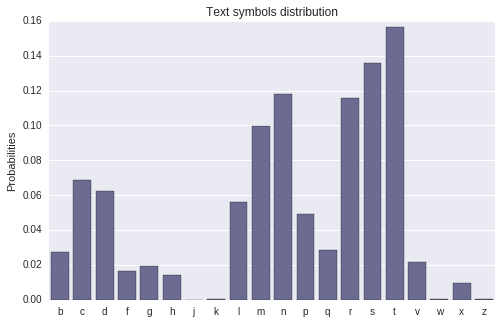

In [9]:
draw_dict(latcons_dict_1, size=(8, 5))

Сделаем то же самое для двухбуквенных сочетаний

In [10]:
latcons_dict_2 = TextUtils.get_normalized_dict(
    TextUtils.get_n_gram_dict(latcons, 2, lang='lat')
)

In [11]:
latcons_dict_2

{u'aa': 0.0,
 u'ab': 0.0,
 u'ac': 0.0,
 u'ad': 0.0,
 u'ae': 0.0,
 u'af': 0.0,
 u'ag': 0.0,
 u'ah': 0.0,
 u'ai': 0.0,
 u'aj': 0.0,
 u'ak': 0.0,
 u'al': 0.0,
 u'am': 0.0,
 u'an': 0.0,
 u'ao': 0.0,
 u'ap': 0.0,
 u'aq': 0.0,
 u'ar': 0.0,
 u'as': 0.0,
 u'at': 0.0,
 u'au': 0.0,
 u'av': 0.0,
 u'aw': 0.0,
 u'ax': 0.0,
 u'ay': 0.0,
 u'az': 0.0,
 u'ba': 0.0,
 u'bb': 0.0006057508888017587,
 u'bc': 0.0005991426972875577,
 u'bd': 0.0007775638681709848,
 u'be': 0.0,
 u'bf': 0.00013656929129348742,
 u'bg': 0.0001652047878550251,
 u'bh': 0.00020044847593076378,
 u'bi': 0.0,
 u'bj': 2.202730504733668e-06,
 u'bk': 2.202730504733668e-06,
 u'bl': 0.002997916216942522,
 u'bm': 0.0013568819909159395,
 u'bn': 0.0035045442330312654,
 u'bo': 0.0,
 u'bp': 0.0004713843280130049,
 u'bq': 0.0003215986536911155,
 u'br': 0.003700587247952562,
 u'bs': 0.0075289328651796765,
 u'bt': 0.004462732002590411,
 u'bu': 0.0,
 u'bv': 0.00032820684520531654,
 u'bw': 0.0,
 u'bx': 5.5068262618341694e-05,
 u'by': 0.0,
 u'bz': 2.20

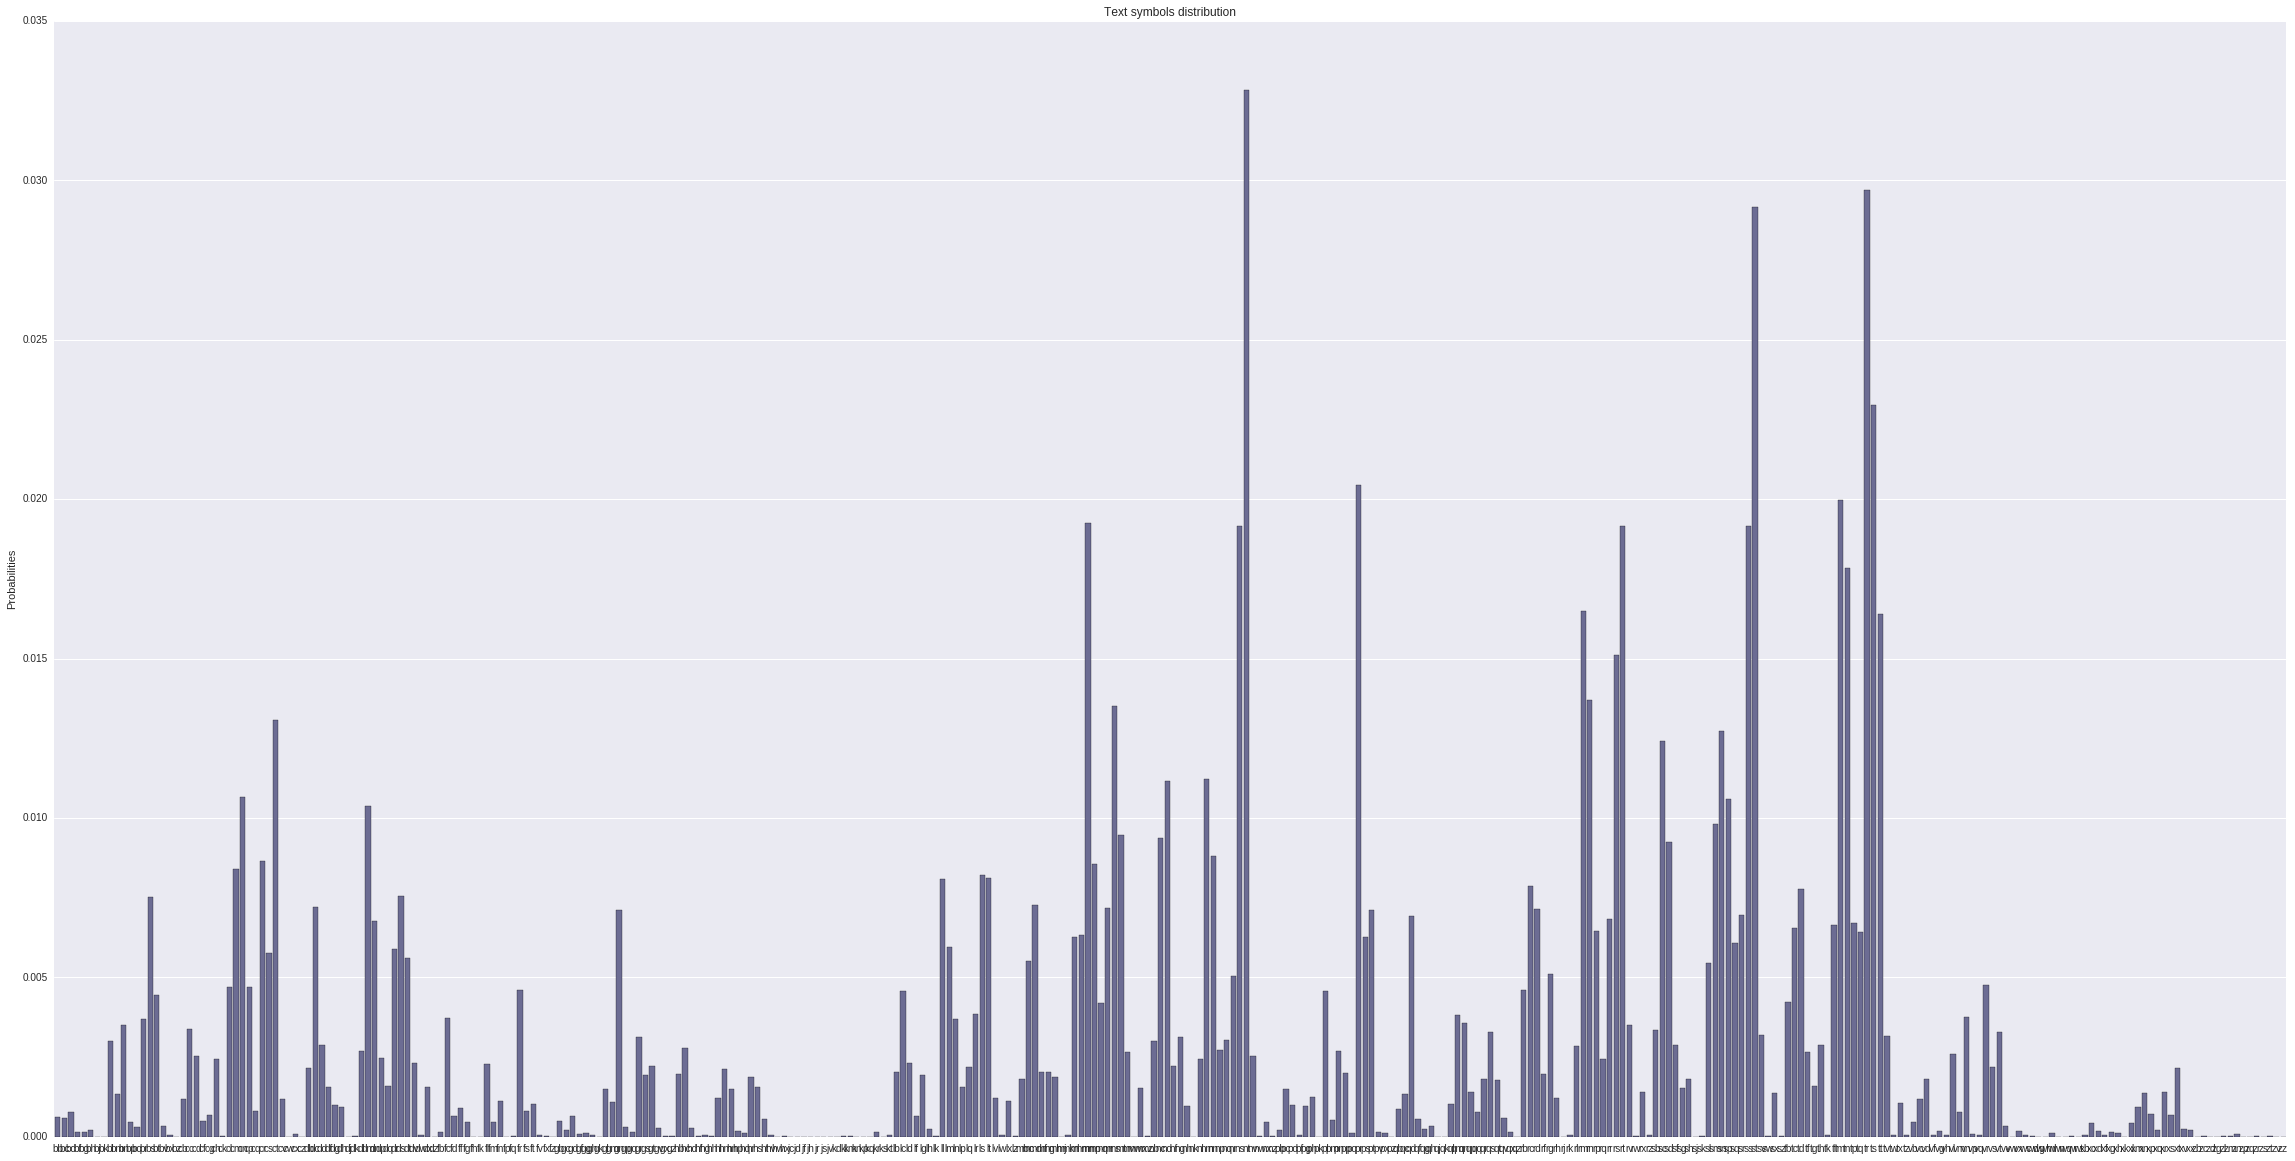

In [12]:
draw_dict(latcons_dict_2, size=(40, 20))
# Тут в целом всё равно не очень понятно, где какие символы, но для полноты картины отобразим

Теперь по аналогии исследуем другой текст

#### Text 2: Dkeng.txt

In [13]:
TextProcessor.process_document('data/voynich', 'dkeng.txt', lang='lat')

In [14]:
with open('data/voynich/processed/dkeng.txt', 'r') as processed_file:
    dkeng=processed_file.read().replace('\n', '')

In [15]:
dkeng[:1000]

'whchtrtsfthchrctrndprstsfthfmsgntlmndnqxtflmnchnvllgflmnchthnmfwhchhvndsrtclltmndthrlvdntlngsncnfthsgntlmnthtkplncnthlncrcknldbcklrlnhckndgrhndfrcrsngnllfrthrmrbfthnmttnsldnmstnghtsscrpsnstrdslntlsnfrdsndpgnrsxtrnsndsmdwwththrqrtrsfhsncmthrstftwntndbltffnclthndvlvtbrchsndshstmtchfrhldswhlnwkdshmdbrvfgrnhsbsthmspnhhdnhshshskprpstfrtncndrtwntndldfrthfldndmrktplcwhsdtsddlthhckswllshndlthbllhkthgfthsgntlmnfrswsbrdrngnffthwsfhrdhbtsprgntftrdvrrlrsrndgrtsprtsmnthwllhvthssrnmwsqxdrqsdfrhrthrssmdffrncfpnnmngththrswhwrtnthsbjctlthghfrmrsnblcnjctrstsmsplnththwsclldqxnthshwvrsfbtlttlmprtnctrtltwllbnghnttstrhrsbrdthfrmthtrthnthtllngftmstknwthnthtthbvnmdgntlmnwhnvrhwstlsrwhchwsmstlllthrrndgvhmslfptrdngbksfchvlrwthschrdrndvdtththlmstntrlnglctdthprstfhsfldsprtsndvnthmngmntfhsprprtndtschptchddhsgrnssndnfttngththsldmnncrftllglndtbbksfchvlrtrdndbrghthmsmnfthmshcldgtbtfllthrwrnnhlkdswllsthsfthfmsflcndslvscmpstnfrthrlcdtfstlndcmplctdcnctswrsprlsnhssghtprtclrlwhnnhsrdnghcmpncrtshpsndcrtlswhrhftnfndpssgslk

In [16]:
len(dkeng)

487767

In [17]:
dkeng_dict_1 = TextUtils.get_normalized_dict(
    TextUtils.get_n_gram_dict(dkeng, 1, lang='lat')
)

In [18]:
dkeng_dict_1

{u'a': 0.0,
 u'b': 0.02362808472077857,
 u'c': 0.03729034559533548,
 u'd': 0.07623106934253444,
 u'e': 0.0,
 u'f': 0.039283100332740836,
 u'g': 0.03110501530443839,
 u'h': 0.11948532803572197,
 u'i': 0.0,
 u'j': 0.0013838574565314997,
 u'k': 0.01120001968152827,
 u'l': 0.06201116516697522,
 u'm': 0.04275812016803105,
 u'n': 0.11440503355085523,
 u'o': 0.0,
 u'p': 0.023111444603673474,
 u'q': 0.0032372013686862784,
 u'r': 0.09231866854461249,
 u's': 0.10513626383088646,
 u't': 0.1573169156585009,
 u'u': 0.0,
 u'v': 0.016741599985238855,
 u'w': 0.03904118154774718,
 u'x': 0.0033807125123265823,
 u'y': 0.0,
 u'z': 0.0009348725928568354}

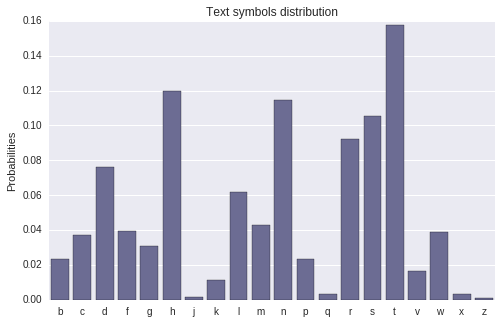

In [19]:
draw_dict(dkeng_dict_1, size=(8, 5))

In [20]:
dkeng_dict_2 = TextUtils.get_normalized_dict(
    TextUtils.get_n_gram_dict(dkeng, 2, lang='lat')
)

In [21]:
dkeng_dict_2

{u'aa': 0.0,
 u'ab': 0.0,
 u'ac': 0.0,
 u'ad': 0.0,
 u'ae': 0.0,
 u'af': 0.0,
 u'ag': 0.0,
 u'ah': 0.0,
 u'ai': 0.0,
 u'aj': 0.0,
 u'ak': 0.0,
 u'al': 0.0,
 u'am': 0.0,
 u'an': 0.0,
 u'ao': 0.0,
 u'ap': 0.0,
 u'aq': 0.0,
 u'ar': 0.0,
 u'as': 0.0,
 u'at': 0.0,
 u'au': 0.0,
 u'av': 0.0,
 u'aw': 0.0,
 u'ax': 0.0,
 u'ay': 0.0,
 u'az': 0.0,
 u'ba': 0.0,
 u'bb': 0.00045923660115711223,
 u'bc': 0.0011952452610473055,
 u'bd': 0.0009738276140608406,
 u'be': 0.0,
 u'bf': 0.0008344165029952887,
 u'bg': 0.0006909050651336912,
 u'bh': 0.0005555942808641848,
 u'bi': 0.0,
 u'bj': 0.00018041437902600838,
 u'bk': 0.0003731297384401537,
 u'bl': 0.002933783822570659,
 u'bm': 0.0003833805554302678,
 u'bn': 0.002859977940241837,
 u'bo': 0.0,
 u'bp': 0.00018861503261809965,
 u'bq': 1.4351143786159757e-05,
 u'br': 0.0038051032667303585,
 u'bs': 0.0019456050647236585,
 u'bt': 0.005621548037378579,
 u'bu': 0.0,
 u'bv': 0.00015171209145368886,
 u'bw': 0.0004120828430025873,
 u'bx': 3.6902941164410804e-05,
 u'by

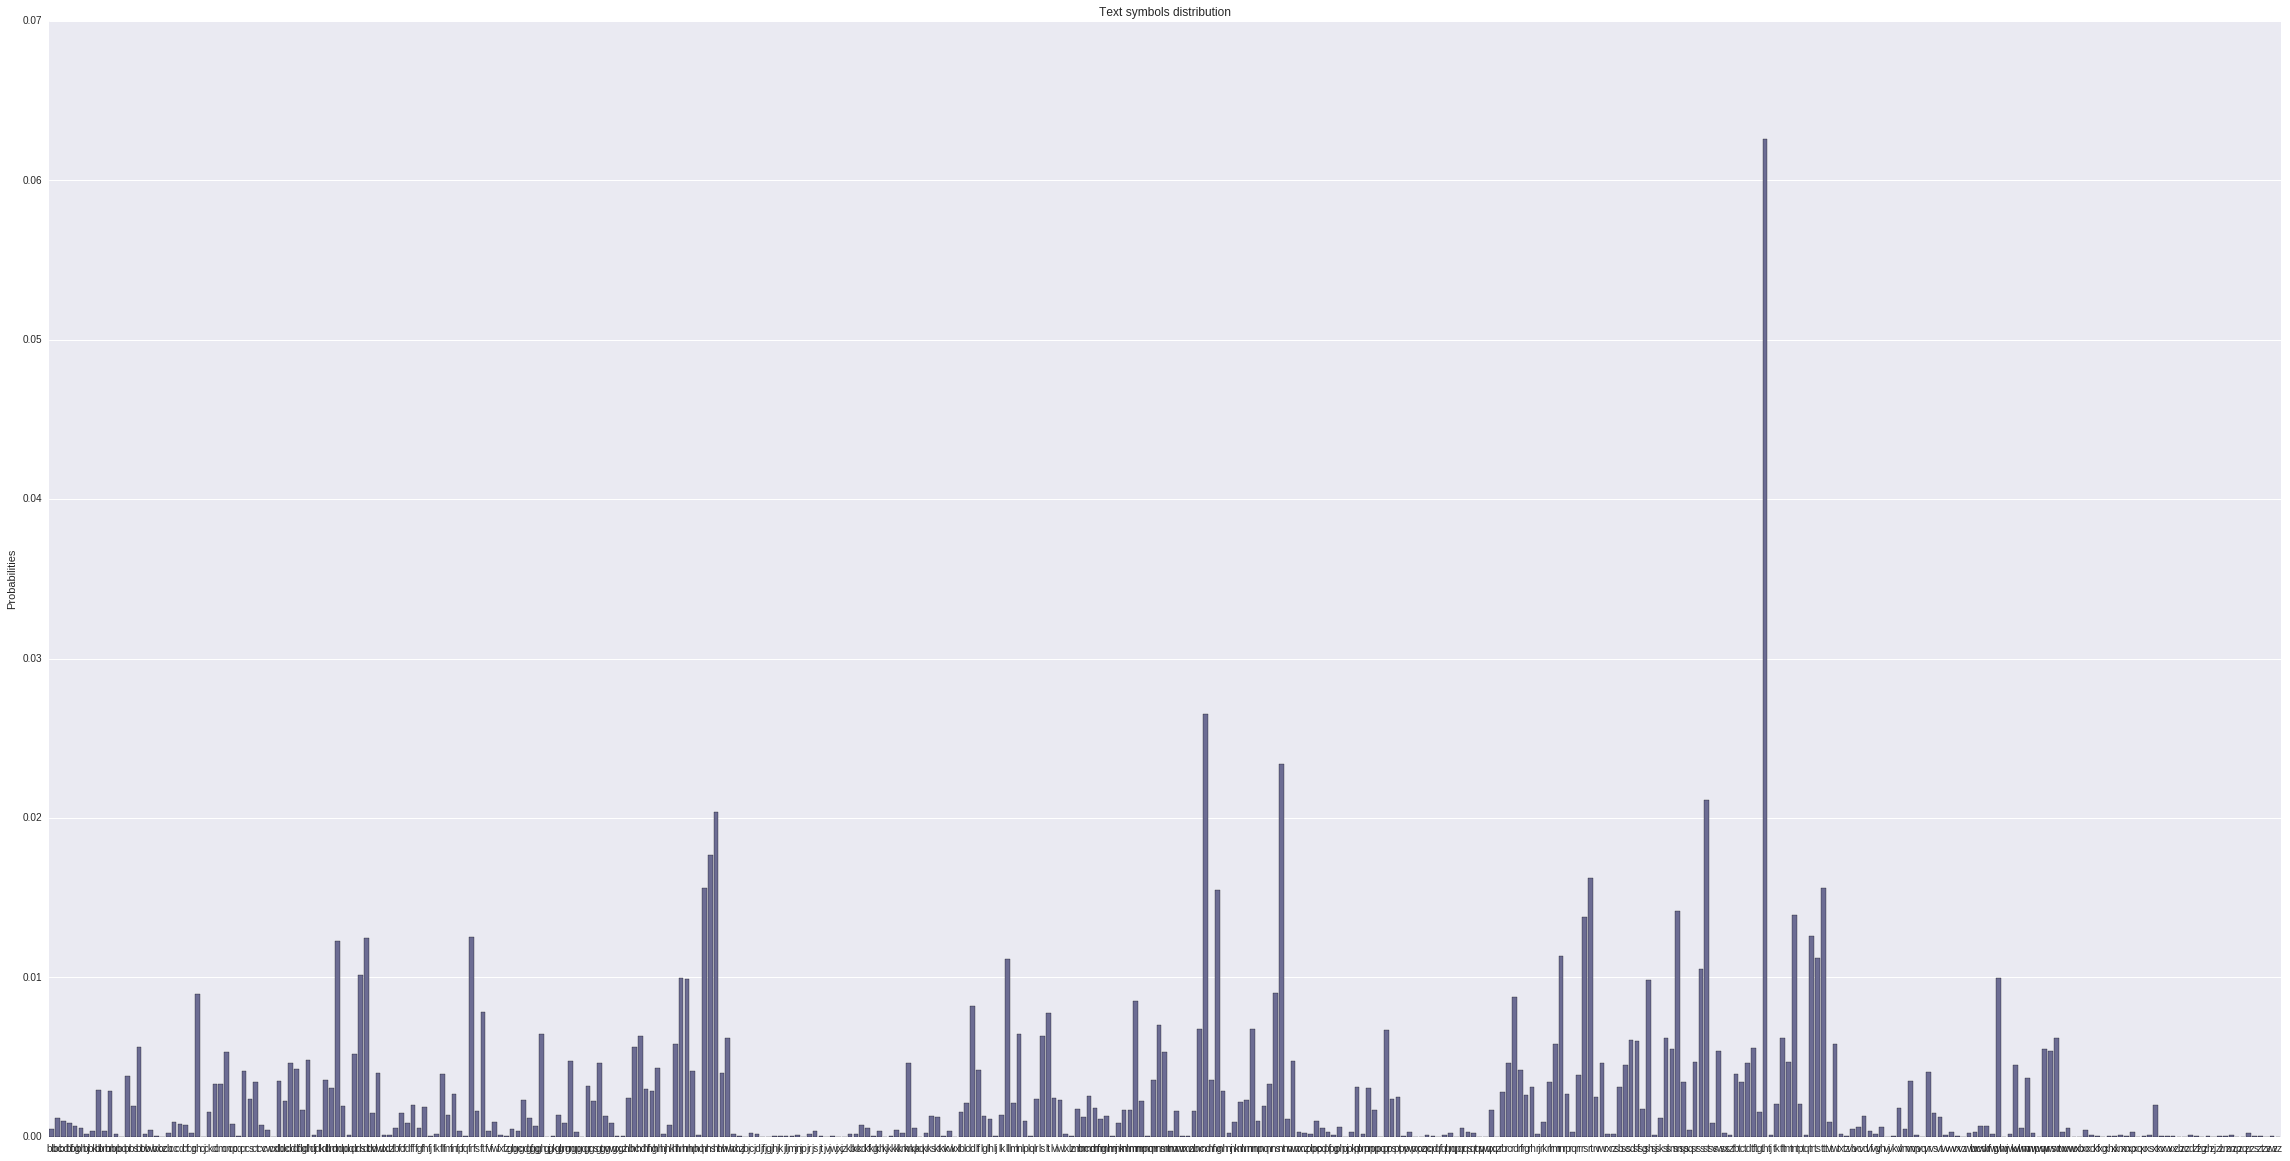

In [22]:
draw_dict(dkeng_dict_2, size=(40, 20))